# HW2  Regression Fun Time!
## Due Saturday Oct 16th, 2021 at Midnight

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. 

In [1]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
%matplotlib inline


Q1) [10 points] Implement the linear regression model discussed in class below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.


In [2]:
def model(x,w):
    y_predicted=w[0]+ np.dot(x.T,w[1:])
    return y_predicted

Q2) [10 ponts] Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [3]:
def least_squares(w,x,y):  
    cost=np.sum((model(x,w)-y)**2)
    return cost/y.size

Q3) [5 point] This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [4]:
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)

def gradient_descent(g,alpha,max_its,w,x,y):
    gradient=grad(g)
    w= np.array(w)
    y= np.array(y)
    x= np.array(x)
    cost_history=[g(w,x,y)]
    weight_history=[w]
    for i in range(max_its):
        w = w - alpha*gradient(w,x,y)
        weight_history.append(w)
        cost_history.append(g(w,x,y))
    return weight_history,cost_history

Q4) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

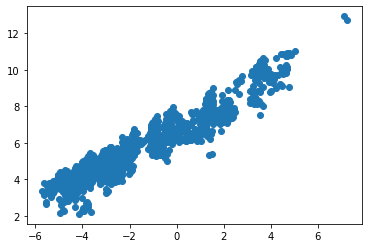

In [5]:
# import the dataset
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = np.log(data[:-1,:])
y = np.log(data[-1:,:])
plt.scatter(x,y)

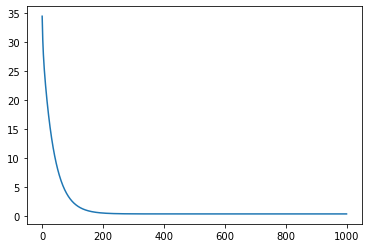

In [6]:
import random
w=[random.uniform(-0.1,0.1),random.uniform(-0.1,0.1)]
history=gradient_descent(least_squares,0.01,1000,w,x,y)
plt.plot(range(1001),history[1])

Q5) [5 points] Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

In [7]:
#Your code here

Q6) [5 points] Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4. 


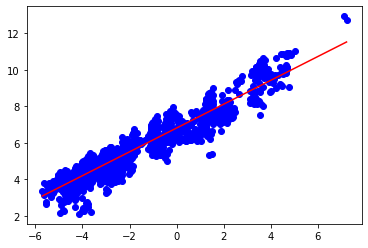

In [8]:
s = np.linspace(np.min(x),np.max(x))
cost=np.array(history[1])
minval=10000000
#find min cost index
for i in range(cost.size):
    if cost[i] < minval:
        minval=cost[i]


bestweight= history[0][history[1].index(minval)]
line=bestweight[0]+s*bestweight[1]

#Your code here
plt.plot(s,line,color='red')
plt.scatter(x,y, color='blue')

Q7) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y). 

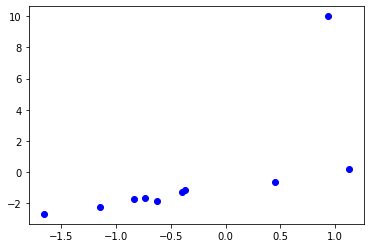

In [9]:
# load in dataset
data = np.loadtxt('regression_outliers.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 
#Your code here
plt.scatter(x,y,color='blue')

Q8) [10 ponts] Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [10]:
def least_absolute_deviations(w,x,y):
    cost=np.sum(abs(model(x,w)-y))
    return cost/y.size

Q9) [5 points] Use the gradient descent function twice to learn two linear models using the new x and y from Q7 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1) 
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2) 
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


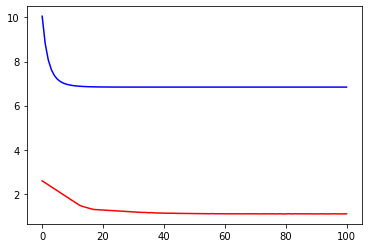

In [11]:
squares=gradient_descent(least_squares,0.1,100,[1.0,1.0],x,y)
absval=gradient_descent(least_absolute_deviations,0.1,100,[1.0,1.0],x,y)
plt.plot(range(101),squares[1],color='blue')
plt.plot(range(101),absval[1],color='red')

Q10) [5 points] Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q7. Which of these lines look like a better fit to you? 


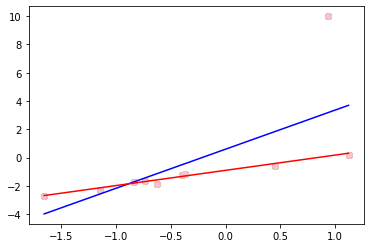

In [12]:
s = np.linspace(np.min(x),np.max(x))
cost=np.array(squares[1])
minval=10000000
#find min cost index
for i in range(cost.size):
    if cost[i] < minval:
        minval=cost[i]


bestweight= squares[0][squares[1].index(minval)]
line=bestweight[0]+s*bestweight[1]


plt.plot(s,line,color='blue')
plt.scatter(x,y, color='green')

cost=np.array(absval[1])
minval=10000000
#find min cost index
for i in range(cost.size):
    if cost[i] < minval:
        minval=cost[i]


bestweight= absval[0][absval[1].index(minval)]
line=bestweight[0]+s*bestweight[1]


plt.plot(s,line,color='red')
plt.scatter(x,y, color='pink')

Q11) [6 points] Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [13]:
def MSE(y_actual,y_pred):
    error=np.sum((y_actual-y_pred)**2)
    return error/y_actual.size

def MAD(y_actual,y_pred):
    error=np.sum(abs(y_actual-y_pred))
    return error/y_actual.size

Q12) [4 points] Use the functions above to report the MSE and MAD for the two models learned in Q9, using the x and y from Q7. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [14]:
print(MSE(model(x,squares[0][-1]),y))
print(MAD(model(x,squares[0][-1]),y))
print(MSE(model(x,absval[0][-1]),y))
print(MAD(model(x,absval[0][-1]),y))

6.841394300667753
1.68937055338514
9.866874898545982
1.09670195220381


Q13) [6 points] Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [15]:
def L2_regularizer(w):
    w=np.array(w)
    L2=np.sum(w**2)
    return L2

def L1_regularizer(w):
    w=np.array(w)
    L1=np.sum(np.abs(w))
    return L1

Q14) [12 points] Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q13. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [16]:
def ridge(w,x,y,lmbda):    
    cost=np.sum((model(x,w)-y)**2)
    return cost/y.size + lmbda*L1(w)


def lasso(w,x,y,lmbda):    
    cost=np.sum((model(x,w)-y)**2)
    return cost/y.size + lmbda*L2(w)

# The rest of the questions are for bonus points, but highly recommended

Q15) [2 points] The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [39]:
import csv
f=open('weatherHistory.csv','r')
lines= f.readlines()
line_count=0
for line in lines:
        if line_count == 0:
            print('Column names are: '+ line) 
            line_count += 1
        else:
            line_count += 1

Column names are: Date,Summary,Precip,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary



Q16) [5 points] Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [56]:
line_count=0
y=[]
x=[]
for line in lines:
    splitline=line.split(",")
    if line_count > 0:
        y.append(float(splitline[3]))
        temp=[float(splitline[4]),float(splitline[5]),float(splitline[6]),float(splitline[7]),float(splitline[8]),float(splitline[10])]
        x.append(temp)
    line_count+=1

        

We are now going to using a well-known ML library called sklearn. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split 

This library is very easy to use. We briefly went over it in the class but please use the API and user guide  ( https://scikit-learn.org) to learn exactly how to use this library.

For instance, learning a linear regression model using sklearn can be done in two lines:

linearModel = LinearRegression() 

linearModel.fit(x_train, y_train)

Q17) [2 points] Use the train_test_split to divide your modified data from Q16 into 80% train, 20% test. 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

Q18) [10 points] Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the .predict method can be used to get the y_predictions for the test xs.

In [59]:
from sklearn.metrics import mean_squared_error
regression=LinearRegression()
regression.fit(X_train, y_train)
y_pred=regression.predict(X_test)
print(mean_squared_error(y_pred,y_test))

0.9008119248471784


Q19) [10 points] Repeat Q18 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

In [61]:
regridge=Ridge()
regridge.fit(X_train, y_train)
y_pred=regridge.predict(X_test)
print(mean_squared_error(y_pred,y_test))


reglasso=Lasso()
reglasso.fit(X_train, y_train)
y_pred=reglasso.predict(X_test)
print(mean_squared_error(y_pred,y_test))

0.9008118979829061
0.9833378912740016


Q20) [4 points] Print the learned parameters for the Ridge and Lasso models (using .coef_).  Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

In [65]:
print(regridge.coef_)
print(reglasso.coef_)

[ 8.72439599e-01 -1.42335969e+00  7.96491538e-02 -4.31405688e-04
  7.93049357e-03 -2.15183442e-04]
[ 8.80120091e-01 -0.00000000e+00  6.85982138e-02 -2.83872348e-04
  0.00000000e+00 -1.63341737e-04]


The lasso eliminated the parameters corresponding to humidity and visibility. It emphasized the weight for apparent temperature.